**Image Noise Reduction using autoencoder**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

**Load MNIST datasetbold text**

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()

**Normalize pixel values to the range [0, 1]bold text**

In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


**Add random noise to the images**

In [20]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

**Clip the images to be between 0 and 1**

In [21]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Define the autoencoder model**

In [22]:
input_img = Input(shape=(28, 28, 1))

**Encoder**

In [23]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

**Decoder**

In [29]:
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

**Autoencoder model**

In [30]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Train the autoencoder**

In [31]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 153s 319ms/step - loss: 0.1325 - val_loss: 0.1065
Epoch 2/10
469/469 [==============================] - 144s 306ms/step - loss: 0.1036 - val_loss: 0.1015
Epoch 3/10
469/469 [==============================] - 139s 296ms/step - loss: 0.1006 - val_loss: 0.0988
Epoch 4/10
469/469 [==============================] - 143s 305ms/step - loss: 0.0990 - val_loss: 0.0976
Epoch 5/10
469/469 [==============================] - 139s 296ms/step - loss: 0.0981 - val_loss: 0.0973
Epoch 6/10
469/469 [==============================] - 138s 295ms/step - loss: 0.0974 - val_loss: 0.0962
Epoch 7/10
469/469 [==============================] - 139s 297ms/step - loss: 0.0969 - val_loss: 0.0962
Epoch 8/10
469/469 [==============================] - 138s 295ms/step - loss: 0.0965 - val_loss: 0.0956
Epoch 9/10
469/469 [==============================] - 139s 296ms/step - loss: 0.0960 - val_loss: 0.0956
Epoch 10/10
469/469 [==============================] - 139s 297m

**Denoise test images**

In [32]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 6s 20ms/step


**Plot original, noisy, and denoised images**

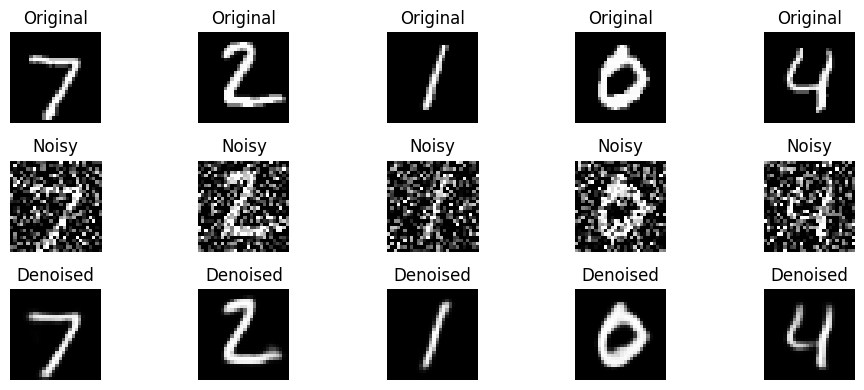

In [33]:
plt.figure(figsize=(10, 4))
for i in range(5):
    # Original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Noisy images
    plt.subplot(3, 5, i + 6)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title('Noisy')
    plt.axis('off')

    # Denoised images
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Denoised')
    plt.axis('off')
plt.tight_layout()
plt.show()